In [1]:
from bauer.utils.data import load_garcia2022
from bauer.models import MagnitudeComparisonModel
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = load_garcia2022()

In [3]:
df['choice'] = df['choice'] == 2.

In [4]:
model = MagnitudeComparisonModel(df)

In [5]:
model.build_model()

In [6]:
trace = model.sample(draws=1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [evidence_sd1_mu_untransformed, evidence_sd1_sd, evidence_sd1_offset, evidence_sd2_mu_untransformed, evidence_sd2_sd, evidence_sd2_offset, n2_prior_mu_mu_untransformed, n2_prior_mu_sd, n2_prior_mu_offset]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 123 seconds.


In [7]:
import arviz as az

/Users/gdehol/mambaforge/lib/python3.10/site-packages/arviz/utils.py:134: UserWarning: Items starting with ~: ['p'] have not been found and will be ignored
  warnings.warn(


array([[<AxesSubplot: title={'center': 'evidence_sd1_mu_untransformed'}>,
        <AxesSubplot: title={'center': 'evidence_sd1_mu_untransformed'}>],
       [<AxesSubplot: title={'center': 'evidence_sd1_offset'}>,
        <AxesSubplot: title={'center': 'evidence_sd1_offset'}>],
       [<AxesSubplot: title={'center': 'evidence_sd2_mu_untransformed'}>,
        <AxesSubplot: title={'center': 'evidence_sd2_mu_untransformed'}>],
       [<AxesSubplot: title={'center': 'evidence_sd2_offset'}>,
        <AxesSubplot: title={'center': 'evidence_sd2_offset'}>],
       [<AxesSubplot: title={'center': 'n2_prior_mu_mu_untransformed'}>,
        <AxesSubplot: title={'center': 'n2_prior_mu_mu_untransformed'}>],
       [<AxesSubplot: title={'center': 'n2_prior_mu_offset'}>,
        <AxesSubplot: title={'center': 'n2_prior_mu_offset'}>],
       [<AxesSubplot: title={'center': 'evidence_sd1_sd'}>,
        <AxesSubplot: title={'center': 'evidence_sd1_sd'}>],
       [<AxesSubplot: title={'center': 'evidence_

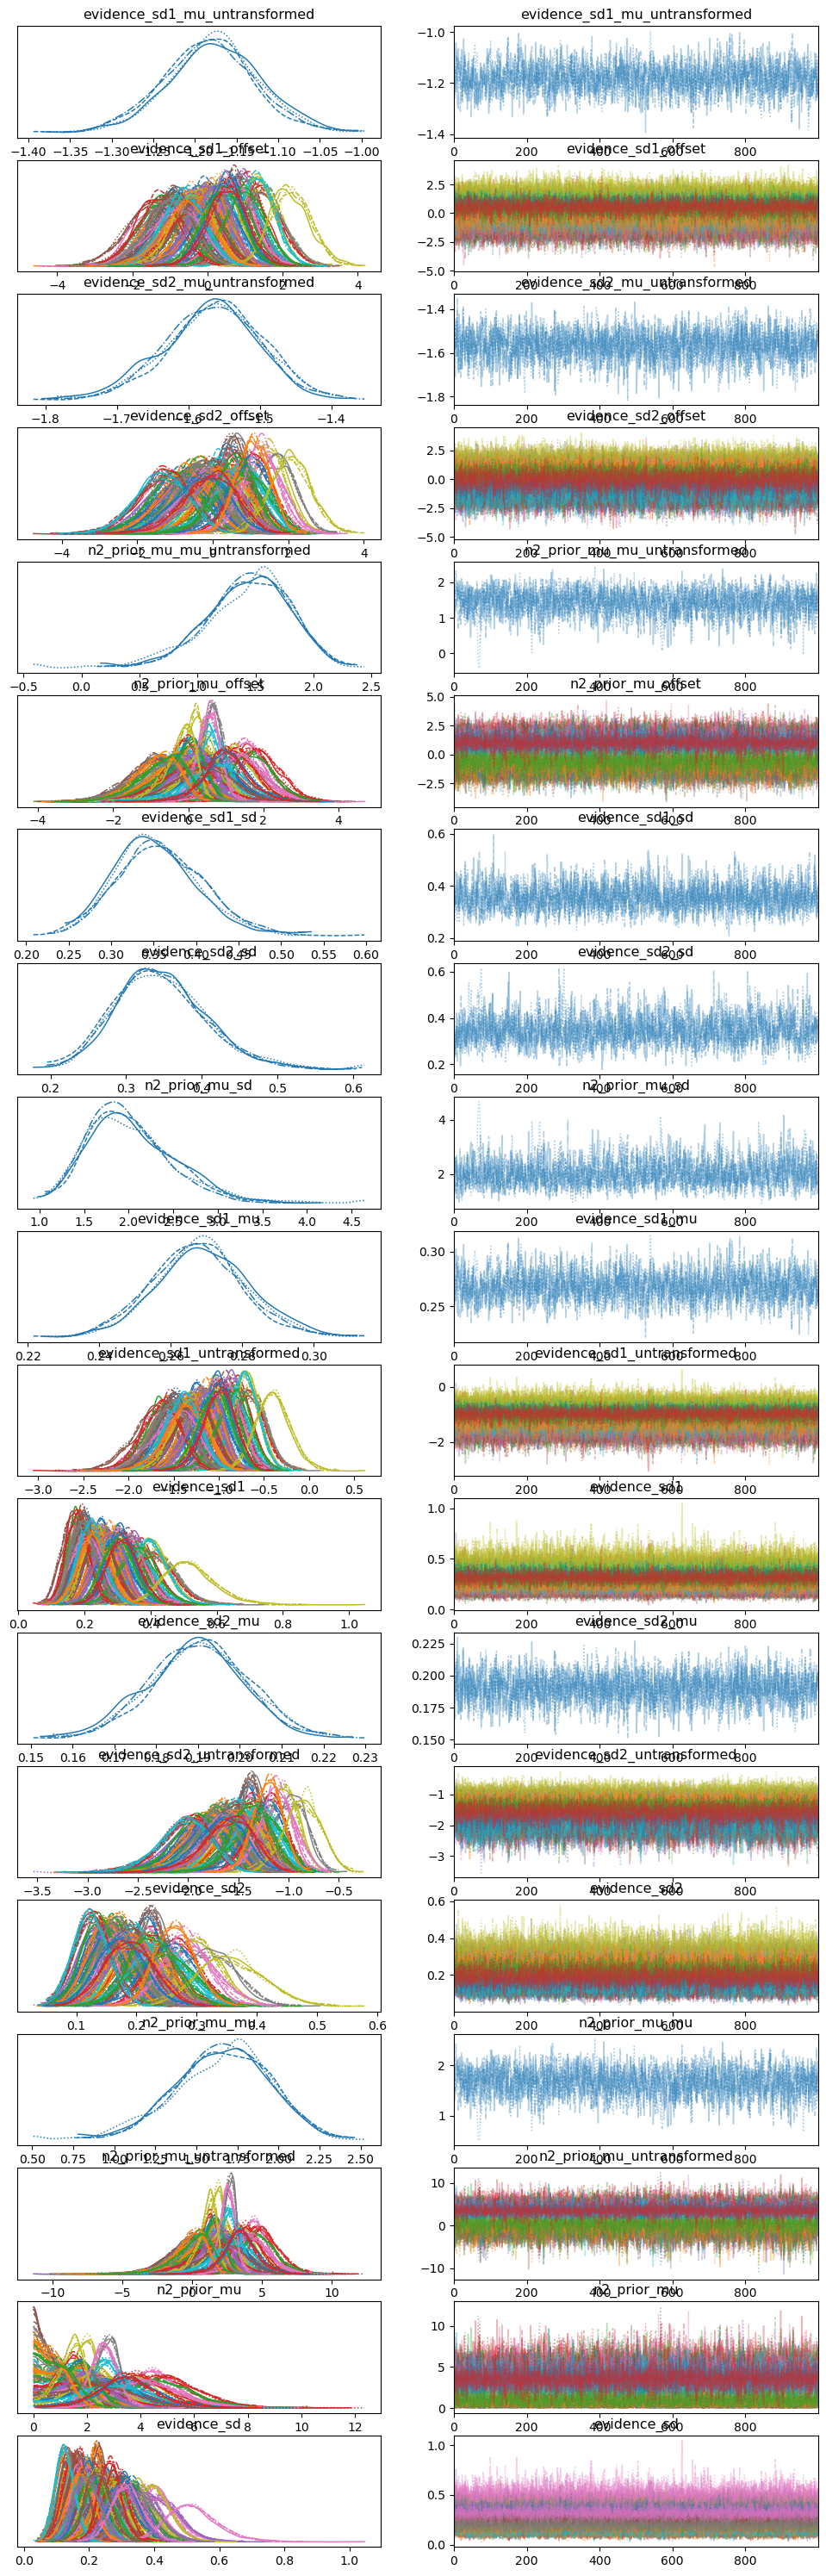

In [8]:
az.plot_trace(trace, var_names=['~p'])

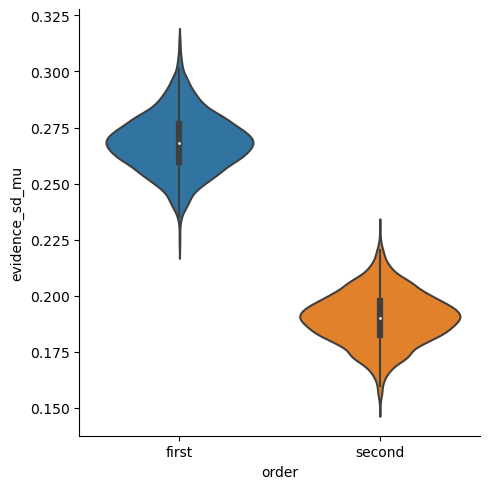

In [9]:
evidence_sd_mu1 = trace.posterior['evidence_sd1_mu'].to_dataframe()
evidence_sd_mu2 = trace.posterior['evidence_sd2_mu'].to_dataframe()
evidence_sd_mu1.columns = evidence_sd_mu2.columns = ['evidence_sd_mu']
evidence_sd_mu = pd.concat((evidence_sd_mu1, evidence_sd_mu2), keys=['first', 'second'], names=['order'])

sns.catplot(evidence_sd_mu.reset_index(), x='order', y='evidence_sd_mu', kind='violin')

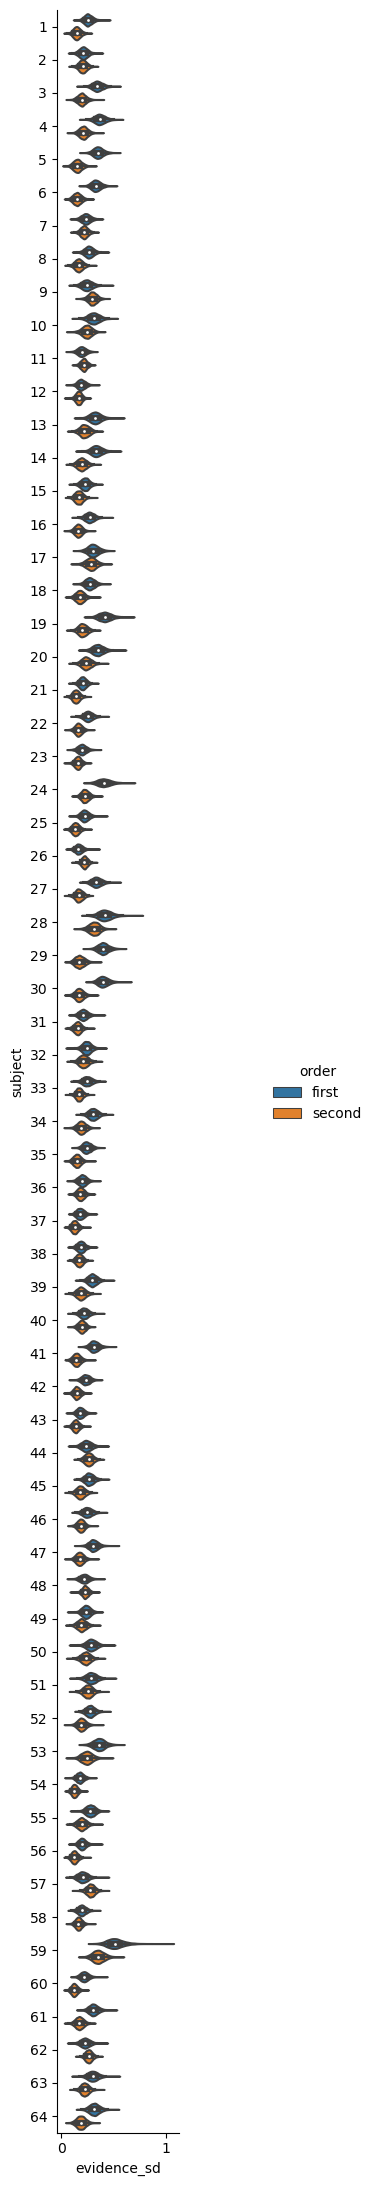

In [10]:
evidence_sd = trace.posterior['evidence_sd'].to_dataframe()
evidence_sd = evidence_sd.reset_index()
evidence_sd['subject'] = pd.Categorical(evidence_sd['subject'])

# evidence_sd = evidence_sd.set_index('subject')
fac = sns.catplot(x='evidence_sd', y='subject', data=evidence_sd, hue='order', aspect=1/3., size=50, kind='violin')

fac.figure.set_size_inches(5, 25)

In [11]:
import matplotlib.pyplot as plt

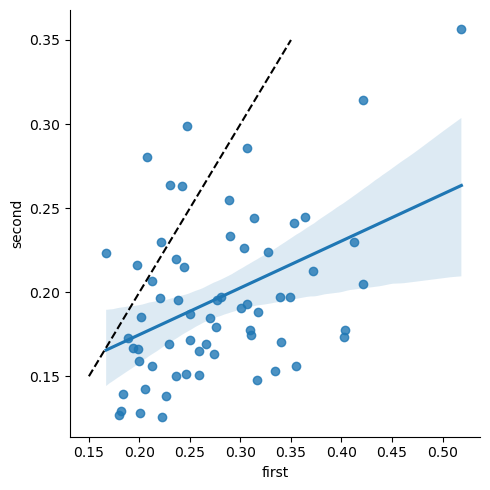

In [12]:
evidence_sd = trace.posterior['evidence_sd'].to_dataframe()
sns.lmplot(x='first', y='second', data=evidence_sd.unstack('order')['evidence_sd'].groupby(['subject']).mean())
plt.plot([.15, .35], [.15, .35], c='k', ls='--')

In [41]:
import pingouin
pingouin.corr(*evidence_sd.unstack('order')['evidence_sd'].groupby(['subject']).mean().values.T)

,n,r,CI95%,p-val,BF10,power
pearson,64,0.424295,"[0.2, 0.61]",0.000476,60.906,0.945381


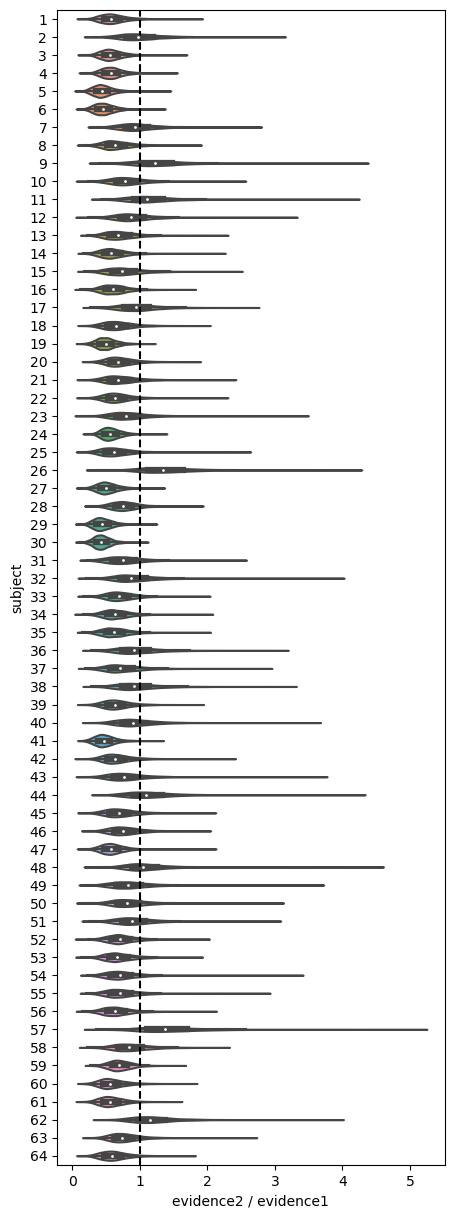

In [29]:
tmp = evidence_sd.unstack('order').droplevel(0, 1)

tmp = (tmp['second'] / tmp['first']).to_frame('evidence2 / evidence1').reset_index()
tmp['subject'] = pd.Categorical(tmp['subject'])

fac = sns.violinplot(data=tmp, x='evidence2 / evidence1', y='subject', kind='violin', aspect=3)
fac.figure.set_size_inches(5, 15)

plt.axvline(1.0, c='k', ls='--')

In [19]:
df['x'] = np.log(df['n2'] / df['n1'])

## Subject 5 and 30 should show particularly large regression effects

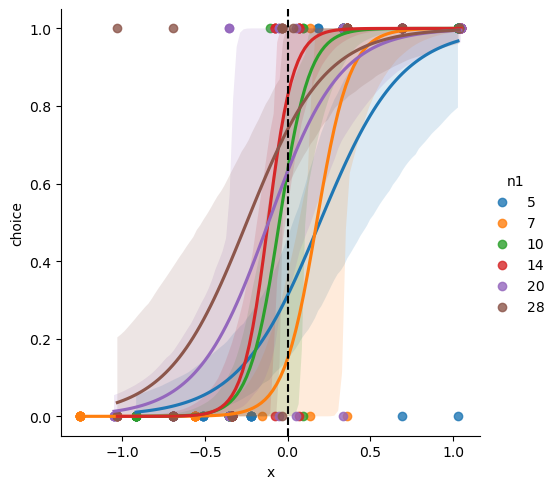

In [31]:
sns.lmplot(data=df.loc[5], x='x', y='choice', logistic=True, hue='n1')
plt.axvline(0.0, c='k', ls='--')

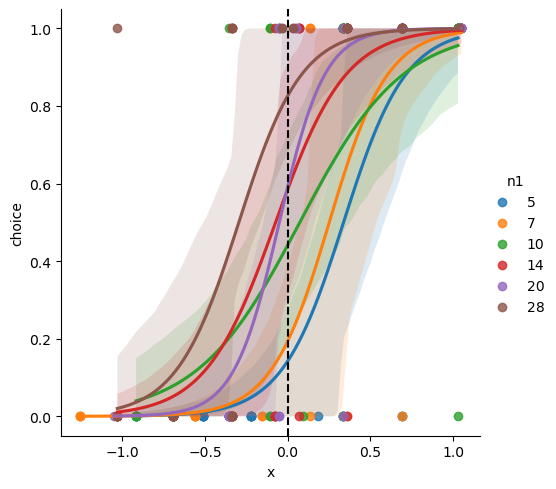

In [32]:
sns.lmplot(data=df.loc[30], x='x', y='choice', logistic=True, hue='n1')
plt.axvline(0.0, c='k', ls='--')

## 2 and 7 shouldn't

/Users/gdehol/mambaforge/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


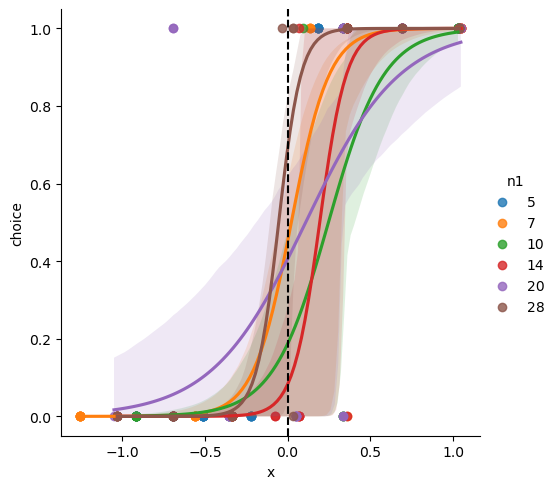

In [33]:
sns.lmplot(data=df.loc[2], x='x', y='choice', logistic=True, hue='n1')
plt.axvline(0.0, c='k', ls='--')


/Users/gdehol/mambaforge/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


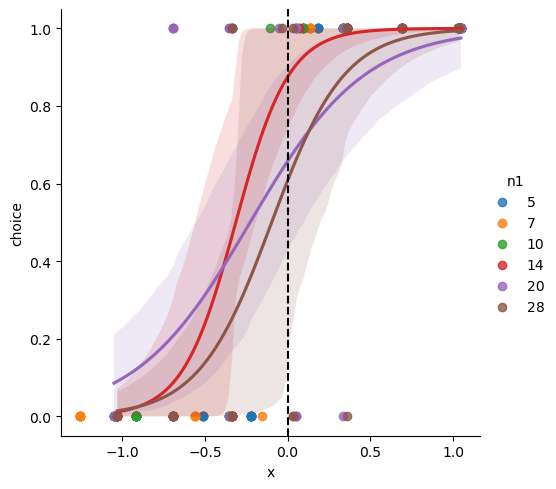

In [34]:
sns.lmplot(data=df.loc[7], x='x', y='choice', logistic=True, hue='n1')
plt.axvline(0.0, c='k', ls='--')
